<a href="https://colab.research.google.com/github/pmensah28/Machine-Learning-Projects/blob/main/Tullow_Oil_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK PRICE PREDICTION**

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


Description

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data set/TLW.L-3.csv")
df.head()

Description

In [2]:
df.head(100)

In [4]:
print(df.head())
print(df.shape)
print(df.columns)
df.to_csv('table1.csv')

Description

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2.529000e+03
mean,326.607652,331.570728,321.041210,325.802626,314.640121,9.854186e+06
std,329.581929,332.500989,326.133327,328.944171,312.731708,1.147309e+07
min,7.750000,8.814000,7.168000,7.546000,7.546000,0.000000e+00
25%,63.560001,65.459999,61.299999,62.880001,62.880001,4.334160e+06
50%,206.500000,210.792007,202.699997,206.600006,202.944885,7.556654e+06
75%,356.578003,363.050415,345.506805,355.811493,347.359131,1.134850e+07
max,1297.034546,1303.847534,1274.892090,1303.847534,1234.518066,1.609165e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2529 non-null   object 
 1   Open       2529 non-null   float64
 2   High       2529 non-null   float64
 3   Low        2529 non-null   float64
 4   Close      2529 non-null   float64
 5   Adj Close  2529 non-null   float64
 6   Volume     2529 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 138.4+ KB


Description

In [5]:
# df.corr()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Description

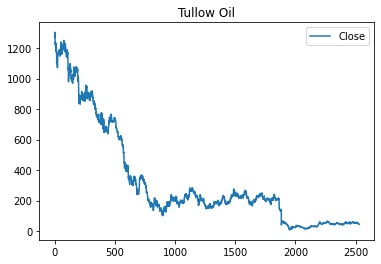

In [ ]:
df[['Close']].plot()
plt.title("Tullow Oil")
plt.show()

Description

Text(0.5, 1.0, 'Tullow Oil Cumulative Returns')

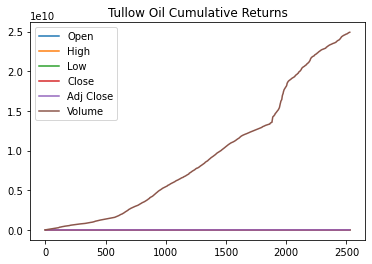

In [ ]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('Tullow Oil Cumulative Returns')

Description

Description


Text(0.5, 1.0, 'Tullow Oil Autocorrelation plot')

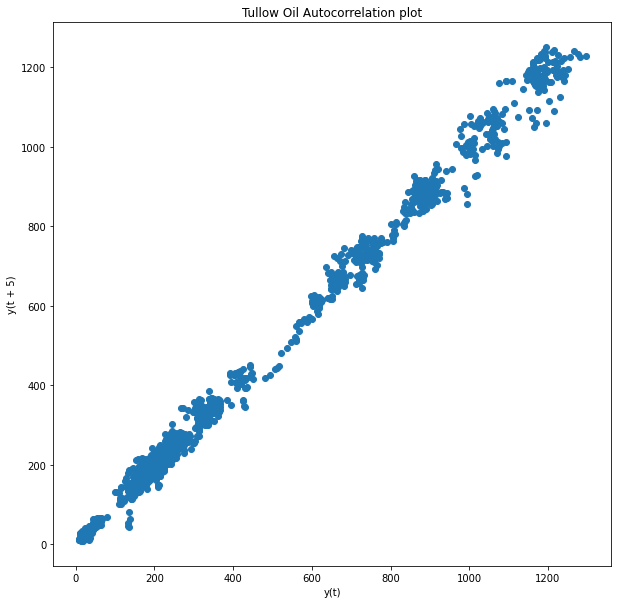

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tullow Oil Autocorrelation plot')

Description

In [ ]:
# df['Date'][2487]

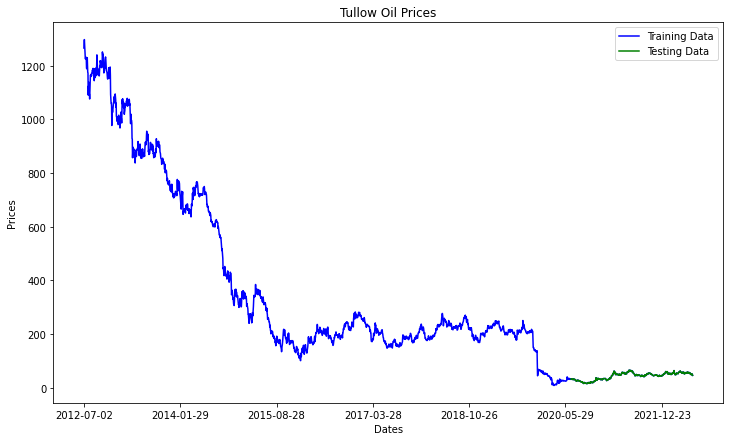

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tullow Oil Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,2487, 400), df['Date'][0:2487:400])
plt.legend()

Description

### **BUILDING THE ARIMA MODEL**

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 3.774
Symmetric mean absolute percentage error: 38.198


Description

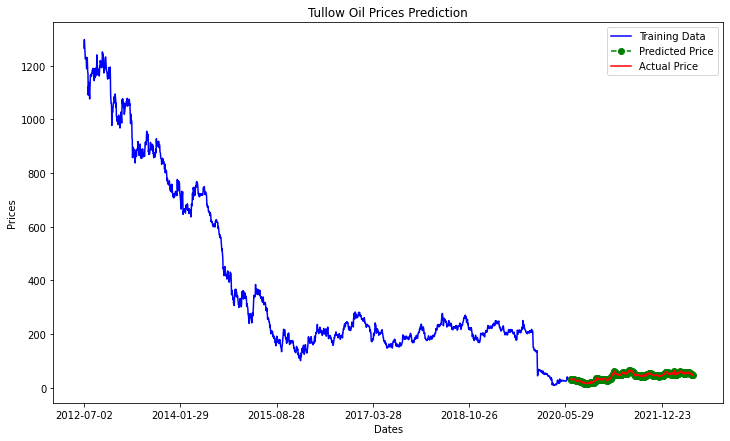

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tullow Oil Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,2487, 400), df['Date'][0:2487:400])
plt.legend()

Description

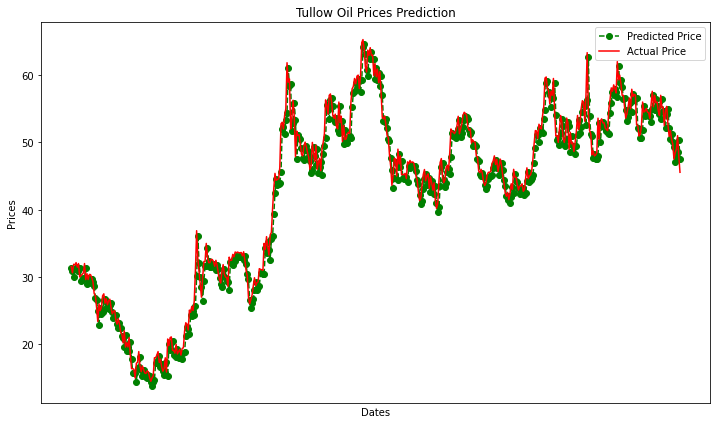

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 600), df['Date'][1486:1856:600])
plt.title('Tullow Oil Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

Description

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2403

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.97503508, 1.        , 0.98094781, 0.96386665, 0.95663999,
       0.93824481, 0.94218669, 0.94809941, 0.92970423, 0.93561696,
       0.90473932, 0.90211146, 0.93233209, 0.94284361, 0.93364602,
       0.89619874, 0.8942278 , 0.83772841, 0.85480957, 0.84955386,
       0.86991989, 0.8416702 , 0.83838533, 0.82064716, 0.8515248 ,
       0.86991989, 0.8942278 , 0.88765816, 0.89028601, 0.89028601,
       0.88962909, 0.89816967, 0.89554182, 0.89357088, 0.90671025,
       0.90276847, 0.89751266, 0.90014061, 0.91130905, 0.8942278 ,
       0.89882659, 0.89554182, 0.87911757, 0.88962909, 0.90671025,
       0.89948351, 0.88437329, 0.90342539, 0.91656486, 0.90473932,
       0.88568722, 0.90145445, 0.9040824 , 0.95072727, 0.94284361,
       0.92116365, 0.90933811, 0.90539633, 0.90079753, 0.90605334])]
[0.8994835085954623]

[array([0.97503508, 1.        , 0.98094781, 0.96386665, 0.95663999,
       0.93824481, 0.94218669, 0.94809941, 0.92970423, 0.93561696,
       0.90473932, 0.90211146, 0.932

Description

### **BUILDING THE LSTM**

In [ ]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

In [ ]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error') 
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

Description

In [ ]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)

model.fit(x_train, 
          y_train, 
          epochs=25, 
          batch_size = 32,
          callbacks = [checkpointer])

Epoch 1/25
74/74 [==============================] - ETA: 0s - loss: 0.0091

74/74 [==============================] - 13s 92ms/step - loss: 0.0091
Epoch 2/25
74/74 [==============================] - ETA: 0s - loss: 0.0015

74/74 [==============================] - 7s 92ms/step - loss: 0.0015
Epoch 3/25
74/74 [==============================] - ETA: 0s - loss: 0.0014

74/74 [==============================] - 7s 92ms/step - loss: 0.0014
Epoch 4/25
74/74 [==============================] - ETA: 0s - loss: 0.0015

74/74 [==============================] - 7s 92ms/step - loss: 0.0015
Epoch 5/25
74/74 [==============================] - ETA: 0s - loss: 0.0013

74/74 [==============================] - 7s 93ms/step - loss: 0.0013
Epoch 6/25
74/74 [==============================] - ETA: 0s - loss: 0.0015

74/74 [==============================] - 7s 93ms/step - loss: 0.0015
Epoch 7/25
74/74 [==============================] - ETA: 0s - loss: 0.0012

74/74 [==============================] - 7s 92ms/step - loss: 0.0012
Epoch 8/25
74/74 [==============================] - ETA: 0s - loss: 0.0013

74/74 [==============================] - 7s 92ms/step - loss: 0.0013
Epoch 9/25
74/74 [==============================] - ETA: 0s - loss: 0.0013

74/74 [==============================] - 7s 92ms/step - loss: 0.0013
Epoch 10/25
74/74 [==============================] - ETA: 0s - loss: 0.0011

74/74 [==============================] - 8s 107ms/step - loss: 0.0011
Epoch 11/25
74/74 [==============================] - ETA: 0s - loss: 0.0010

74/74 [==============================] - 8s 104ms/step - loss: 0.0010
Epoch 12/25
74/74 [==============================] - ETA: 0s - loss: 9.0677e-04

74/74 [==============================] - 7s 91ms/step - loss: 9.0677e-04
Epoch 13/25
74/74 [==============================] - ETA: 0s - loss: 8.9382e-04

74/74 [==============================] - 7s 92ms/step - loss: 8.9382e-04
Epoch 14/25
74/74 [==============================] - ETA: 0s - loss: 0.0011

74/74 [==============================] - 7s 93ms/step - loss: 0.0011
Epoch 15/25
74/74 [==============================] - ETA: 0s - loss: 9.5449e-04

74/74 [==============================] - 7s 91ms/step - loss: 9.5449e-04
Epoch 16/25
74/74 [==============================] - ETA: 0s - loss: 0.0012

74/74 [==============================] - 7s 93ms/step - loss: 0.0012
Epoch 17/25
74/74 [==============================] - ETA: 0s - loss: 9.3257e-04

74/74 [==============================] - 8s 104ms/step - loss: 9.3257e-04
Epoch 18/25
74/74 [==============================] - ETA: 0s - loss: 9.9672e-04

74/74 [==============================] - 8s 102ms/step - loss: 9.9672e-04
Epoch 19/25
74/74 [==============================] - ETA: 0s - loss: 8.1247e-04

74/74 [==============================] - 7s 92ms/step - loss: 8.1247e-04
Epoch 20/25
74/74 [==============================] - ETA: 0s - loss: 8.3688e-04

74/74 [==============================] - 7s 94ms/step - loss: 8.3688e-04
Epoch 21/25
74/74 [==============================] - ETA: 0s - loss: 8.1275e-04

74/74 [==============================] - 7s 95ms/step - loss: 8.1275e-04
Epoch 22/25
74/74 [==============================] - ETA: 0s - loss: 8.3529e-04

74/74 [==============================] - 7s 96ms/step - loss: 8.3529e-04
Epoch 23/25
74/74 [==============================] - ETA: 0s - loss: 8.4971e-04

74/74 [==============================] - 7s 94ms/step - loss: 8.4971e-04
Epoch 24/25
74/74 [==============================] - ETA: 0s - loss: 7.8957e-04

74/74 [==============================] - 7s 92ms/step - loss: 7.8957e-04
Epoch 25/25
74/74 [==============================] - ETA: 0s - loss: 8.0559e-04

74/74 [==============================] - 7s 92ms/step - loss: 8.0559e-04


Description

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.383306255869782

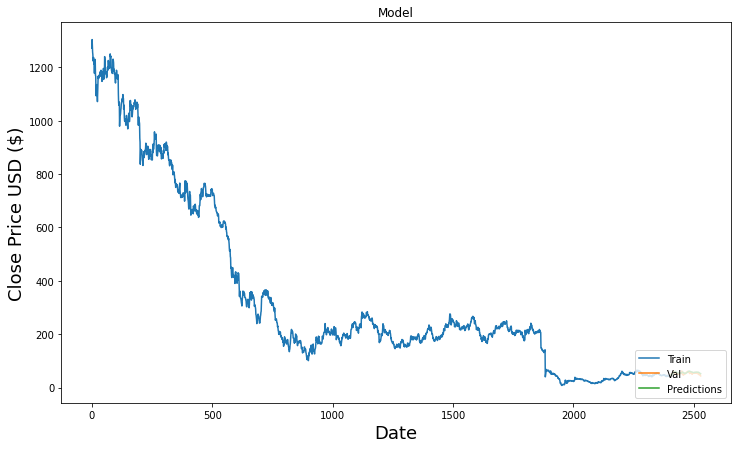

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,7))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Description

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
2403,45.430000,46.679447
2404,46.450001,46.878117
2405,47.639999,47.132561
2406,49.970001,47.470337
2407,51.759998,47.951771
...,...,...
2524,49.060001,54.217209
2525,49.799999,53.539879
2526,48.500000,52.972458
2527,46.860001,52.501476
